In [11]:
import pandas as pd
import numpy as np
import re
import nltk
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import sys
print(sys.version)

3.12.11 (main, Jun  4 2025, 08:56:18) [GCC 11.4.0]


# **1. Preprocessing (Cleaning)**

In [17]:
# Membaca data scraping
path = '/content/drive/MyDrive/portofolio_data_analyst/HasilCekJumlahData.csv'
ulasanSumbersira = pd.read_csv(path)
ulasanSumbersira

,wiI7pd,d4r55,rsqaWe
0,Enak banget jernih dan pas lagi sepi,Rahma Aaa,2 hari lalu
1,Tempat berenang yang jernih alami airnya juga ...,Eka Pratomo,5 hari lalu
2,Pemandangan cantik dan sumber yang jernih,Torek Iyho,2 minggu lalu
3,Tempat sumber air yang jernih dan bisa buat be...,Dwi Prof,2 minggu lalu
4,tiket dan makanan murah. petugasnya rendah hati.,Wawan Sobari,2 minggu lalu
...,...,...,...
1359,Sumber mata air yang sangat bagus. Mohon untuk...,Moch. Nur Ifrochan,5 tahun lalu
1360,Tempat nya nyaman dan asik,Sagitarius Learning,5 tahun lalu
1361,Tempat mnghabiskan weekend recomended. Yg mau ...,zahrotut takiyah,5 tahun lalu
1362,Segar,Widhy San,5 tahun lalu


In [19]:
ulasan = ulasanSumbersira['wiI7pd']

In [20]:
# Fungsi proses cleaning data
def clean_text(text):
    # Menghapus angka dan simbol
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Proses case folding/mengubah ke huruf kecil
    text = text.lower()
    # Menghapus single char
    text = re.sub(r"\b[a-zA-Z]\b"," ", text)
    # Memisahkan dan menggabungkan kata
    text = ' '.join(text.split())
    return text

In [21]:
# Menerapkan proses fungsi cleaning pada kolom ulasan_pengunjung dan disimpan pada kolom ulasan_clean
ulasanSumbersira['ulasan_clean'] = [clean_text(i) for i in ulasan]
ulasanSumbersira

,wiI7pd,d4r55,rsqaWe,ulasan_clean
0,Enak banget jernih dan pas lagi sepi,Rahma Aaa,2 hari lalu,enak banget jernih dan pas lagi sepi
1,Tempat berenang yang jernih alami airnya juga ...,Eka Pratomo,5 hari lalu,tempat berenang yang jernih alami airnya juga ...
2,Pemandangan cantik dan sumber yang jernih,Torek Iyho,2 minggu lalu,pemandangan cantik dan sumber yang jernih
3,Tempat sumber air yang jernih dan bisa buat be...,Dwi Prof,2 minggu lalu,tempat sumber air yang jernih dan bisa buat be...
4,tiket dan makanan murah. petugasnya rendah hati.,Wawan Sobari,2 minggu lalu,tiket dan makanan murah petugasnya rendah hati
...,...,...,...,...
1359,Sumber mata air yang sangat bagus. Mohon untuk...,Moch. Nur Ifrochan,5 tahun lalu,sumber mata air yang sangat bagus mohon untuk ...
1360,Tempat nya nyaman dan asik,Sagitarius Learning,5 tahun lalu,tempat nya nyaman dan asik
1361,Tempat mnghabiskan weekend recomended. Yg mau ...,zahrotut takiyah,5 tahun lalu,tempat mnghabiskan weekend recomended yg mau b...
1362,Segar,Widhy San,5 tahun lalu,segar


In [22]:
# Cek jumlah baris kolom ulasan_clean
ulasanSumbersira['ulasan_clean'].shape

(1364,)

In [23]:
# Menghapus kolom data yang tidak memiliki komentar (kosong)
ulasanSumbersira['ulasan_clean'] = ulasanSumbersira['ulasan_clean'].replace(r'^\s*$', np.nan, regex=True)
ulasanSumbersira = ulasanSumbersira.dropna(subset=['ulasan_clean']).copy()

In [24]:
# Cek apakah masih ada data yang kosong
ulasanSumbersira['ulasan_clean'].isnull().sum()

np.int64(0)

In [25]:
# Hitung ulang jumlah baris kolom ulasan_clean
ulasanSumbersira['ulasan_clean'].shape

(1354,)

In [26]:
ulasanSumbersira

,wiI7pd,d4r55,rsqaWe,ulasan_clean
0,Enak banget jernih dan pas lagi sepi,Rahma Aaa,2 hari lalu,enak banget jernih dan pas lagi sepi
1,Tempat berenang yang jernih alami airnya juga ...,Eka Pratomo,5 hari lalu,tempat berenang yang jernih alami airnya juga ...
2,Pemandangan cantik dan sumber yang jernih,Torek Iyho,2 minggu lalu,pemandangan cantik dan sumber yang jernih
3,Tempat sumber air yang jernih dan bisa buat be...,Dwi Prof,2 minggu lalu,tempat sumber air yang jernih dan bisa buat be...
4,tiket dan makanan murah. petugasnya rendah hati.,Wawan Sobari,2 minggu lalu,tiket dan makanan murah petugasnya rendah hati
...,...,...,...,...
1359,Sumber mata air yang sangat bagus. Mohon untuk...,Moch. Nur Ifrochan,5 tahun lalu,sumber mata air yang sangat bagus mohon untuk ...
1360,Tempat nya nyaman dan asik,Sagitarius Learning,5 tahun lalu,tempat nya nyaman dan asik
1361,Tempat mnghabiskan weekend recomended. Yg mau ...,zahrotut takiyah,5 tahun lalu,tempat mnghabiskan weekend recomended yg mau b...
1362,Segar,Widhy San,5 tahun lalu,segar


# **2. Preprocessing (Normalization)**

In [27]:
# Membaca kamus normalisasi yang telah dibuat
path = '/content/drive/MyDrive/portofolio_data_analyst/kamusNormalisasi.csv'
normalization = pd.read_csv(path, encoding='latin1')

# Memastikan kata yang dihilangkan terbaca string kosongan (true bukan false)
normalization.fillna('', inplace=True)

# Dictionary dari kamus kata_normalisasi
normalization_word_dict = dict(zip(normalization['slang'], normalization['kata_baku']))

# Fungsi normalisasi
def normalization_term(document):
    words = str(document).split()
    normalized = [str(normalization_word_dict.get(word, word)) for word in words]
    return ' '.join([word for word in normalized if word.strip() != '' ])

# Memastikan semua baris dalam kolom ulasan_clean bertipe string
ulasanSumbersira['ulasan_clean'] = ulasanSumbersira['ulasan_clean'].fillna('').astype(str)

# Menerapkan proses fungsi normalisasi pada kolom ulasan_clean dan disimpan pada kolom ulasan_normalisasi
ulasanSumbersira['ulasan_normalisasi'] = ulasanSumbersira['ulasan_clean'].apply(normalization_term)
ulasanSumbersira[['ulasan_clean', 'ulasan_normalisasi']]

,ulasan_clean,ulasan_normalisasi
0,enak banget jernih dan pas lagi sepi,enak sangat jernih dan saat lagi sepi
1,tempat berenang yang jernih alami airnya juga ...,tempat berenang yang jernih alami airnya juga ...
2,pemandangan cantik dan sumber yang jernih,pemandangan cantik dan sumber yang jernih
3,tempat sumber air yang jernih dan bisa buat be...,tempat sumber air yang jernih dan bisa untuk b...
4,tiket dan makanan murah petugasnya rendah hati,tiket dan makanan murah petugasnya rendah hati
...,...,...
1359,sumber mata air yang sangat bagus mohon untuk ...,sumber mata air yang sangat bagus mohon untuk ...
1360,tempat nya nyaman dan asik,tempat nyaman dan seru
1361,tempat mnghabiskan weekend recomended yg mau b...,tempat menghabiskan weekend recommended yang m...
1362,segar,segar


In [28]:
ulasanSumbersira['ulasan_normalisasi'].shape

(1354,)

In [29]:
ulasanSumbersira['ulasan_normalisasi'] = ulasanSumbersira['ulasan_normalisasi'].replace(r'^\s*$', np.nan, regex=True)
ulasanSumbersira = ulasanSumbersira.dropna(subset=['ulasan_normalisasi']).copy()

In [30]:
ulasanSumbersira['ulasan_clean'].isnull().sum()

np.int64(0)

In [31]:
ulasanSumbersira['ulasan_normalisasi'].shape

(1348,)

In [32]:
ulasanSumbersira[['ulasan_clean', 'ulasan_normalisasi']]

,ulasan_clean,ulasan_normalisasi
0,enak banget jernih dan pas lagi sepi,enak sangat jernih dan saat lagi sepi
1,tempat berenang yang jernih alami airnya juga ...,tempat berenang yang jernih alami airnya juga ...
2,pemandangan cantik dan sumber yang jernih,pemandangan cantik dan sumber yang jernih
3,tempat sumber air yang jernih dan bisa buat be...,tempat sumber air yang jernih dan bisa untuk b...
4,tiket dan makanan murah petugasnya rendah hati,tiket dan makanan murah petugasnya rendah hati
...,...,...
1359,sumber mata air yang sangat bagus mohon untuk ...,sumber mata air yang sangat bagus mohon untuk ...
1360,tempat nya nyaman dan asik,tempat nyaman dan seru
1361,tempat mnghabiskan weekend recomended yg mau b...,tempat menghabiskan weekend recommended yang m...
1362,segar,segar


# **3. Preprocessing (Tokenizing)**

In [33]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

# Fungsi tokenizing menggunakan NLTK
def tokenize(text_list):
    return [word_tokenize(text) for text in text_list]

# Menerapkan proses fungsi tokenizing pada kolom ulasan_normalisasi dan disimpan pada kolom ulasan_tokenizing
ulasanSumbersira['ulasan_tokenizing'] = ulasanSumbersira['ulasan_normalisasi'].apply(word_tokenize)
ulasanSumbersira[['ulasan_normalisasi', 'ulasan_tokenizing']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,ulasan_normalisasi,ulasan_tokenizing
0,enak sangat jernih dan saat lagi sepi,"[enak, sangat, jernih, dan, saat, lagi, sepi]"
1,tempat berenang yang jernih alami airnya juga ...,"[tempat, berenang, yang, jernih, alami, airnya..."
2,pemandangan cantik dan sumber yang jernih,"[pemandangan, cantik, dan, sumber, yang, jernih]"
3,tempat sumber air yang jernih dan bisa untuk b...,"[tempat, sumber, air, yang, jernih, dan, bisa,..."
4,tiket dan makanan murah petugasnya rendah hati,"[tiket, dan, makanan, murah, petugasnya, renda..."
...,...,...
1359,sumber mata air yang sangat bagus mohon untuk ...,"[sumber, mata, air, yang, sangat, bagus, mohon..."
1360,tempat nyaman dan seru,"[tempat, nyaman, dan, seru]"
1361,tempat menghabiskan weekend recommended yang m...,"[tempat, menghabiskan, weekend, recommended, y..."
1362,segar,[segar]


# **4. Preprocessing (Stopword Removal)**

In [34]:
from nltk.corpus import stopwords
nltk.download('stopwords')

# Memastikan corpus stopword yang digunakan merupakan bahasa indonesia
stop_words = set(stopwords.words("indonesian"))

# Fungsi stopwords removal menggunakan NLTK
def remove_stopwords(text):
    text = [word for word in text if word not in stop_words]
    return text

# Menerapkan proses fungsi stopwords pada kolom ulasan_tokenizing dan disimpan pada kolom ulasan_stopwords
ulasanSumbersira['ulasan_stopwords'] = ulasanSumbersira['ulasan_tokenizing'].apply(remove_stopwords)
ulasanSumbersira[['ulasan_tokenizing', 'ulasan_stopwords']]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,ulasan_tokenizing,ulasan_stopwords
0,"[enak, sangat, jernih, dan, saat, lagi, sepi]","[enak, jernih, sepi]"
1,"[tempat, berenang, yang, jernih, alami, airnya...","[berenang, jernih, alami, airnya, segar]"
2,"[pemandangan, cantik, dan, sumber, yang, jernih]","[pemandangan, cantik, sumber, jernih]"
3,"[tempat, sumber, air, yang, jernih, dan, bisa,...","[sumber, air, jernih, berenang, mantap]"
4,"[tiket, dan, makanan, murah, petugasnya, renda...","[tiket, makanan, murah, petugasnya, rendah, hati]"
...,...,...
1359,"[sumber, mata, air, yang, sangat, bagus, mohon...","[sumber, mata, air, bagus, mohon, merawat, ber..."
1360,"[tempat, nyaman, dan, seru]","[nyaman, seru]"
1361,"[tempat, menghabiskan, weekend, recommended, y...","[menghabiskan, weekend, recommended, basah, si..."
1362,[segar],[segar]


# **5. Preprocessing (Stemming)**

In [35]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.0 MB/s eta 0:00:00


In [36]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi Stemming menggunakan Sastrawi
def stemming_term(document):
    document = str(document)
    return stemmer.stem(document)

# Menerapkan proses fungsi stemming pada kolom ulasan_stopwords dan disimpan pada kolom ulasan_stemming
ulasanSumbersira['ulasan_stemming'] = ulasanSumbersira['ulasan_stopwords'].apply(stemming_term)
ulasanSumbersira[['ulasan_stopwords', 'ulasan_stemming']]

,ulasan_stopwords,ulasan_stemming
0,"[enak, jernih, sepi]",enak jernih sepi
1,"[berenang, jernih, alami, airnya, segar]",renang jernih alami air segar
2,"[pemandangan, cantik, sumber, jernih]",pandang cantik sumber jernih
3,"[sumber, air, jernih, berenang, mantap]",sumber air jernih renang mantap
4,"[tiket, makanan, murah, petugasnya, rendah, hati]",tiket makan murah tugas rendah hati
...,...,...
1359,"[sumber, mata, air, bagus, mohon, merawat, ber...",sumber mata air bagus mohon rawat kunjung
1360,"[nyaman, seru]",nyaman seru
1361,"[menghabiskan, weekend, recommended, basah, si...",habis weekend recommended basah silah tarif ma...
1362,[segar],segar


# **6. Preprocessing (Translation)**

In [40]:
# Membaca hasil proses normalisasi yang telah diterjemahkan kedalam bahasa inggris
path = '/content/drive/MyDrive/portofolio_data_analyst/hasil_translate.csv'
ulasanSumbersira = pd.read_csv(path)
ulasanSumbersira[['ulasan_normalisasi', 'ulasan_translate']]

,ulasan_normalisasi,ulasan_translate
0,enak sangat jernih dan saat lagi sepi,very clear and when it's quiet
1,tempat berenang yang jernih alami airnya juga ...,a clear natural swimming place for the water i...
2,pemandangan cantik dan sumber yang jernih,beautiful views and clear sources
3,tempat sumber air yang jernih dan bisa untuk b...,a clear water source and can be for steady swi...
4,tiket dan makanan murah petugasnya rendah hati,cheap tickets and foods the officers are humble
...,...,...
1343,sumber mata air yang sangat bagus mohon untuk ...,"Very good springs, please take care of them to..."
1344,tempat nyaman dan seru,comfortable and exciting place
1345,tempat menghabiskan weekend recommended yang m...,a place to spend weekend recommended who want ...
1346,segar,fresh


# **7. Preprocessing (Labeling)**

In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

ulasanSumbersira = pd.read_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_translate.csv')

# Fungsi untuk menghitung polarity score setiap kategori labeling
sentiments = SentimentIntensityAnalyzer()
ulasanSumbersira["Positif"] = [sentiments.polarity_scores(i)["pos"] for i in ulasanSumbersira["ulasan_translate"]]
ulasanSumbersira["Negatif"] = [sentiments.polarity_scores(i)["neg"] for i in ulasanSumbersira["ulasan_translate"]]
ulasanSumbersira["Netral"] = [sentiments.polarity_scores(i)["neu"] for i in ulasanSumbersira["ulasan_translate"]]
ulasanSumbersira['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in ulasanSumbersira["ulasan_translate"]]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [42]:
# Fungsi labeling menggunakan NLTK Vader Sentiment
score = ulasanSumbersira["Compound"].values
sentiment = []
for i in score:
  if i >= 0.05 :
      sentiment.append('positif')
  elif i <= -0.05 :
      sentiment.append('negatif')
  else:
      sentiment.append('netral')

# Menerapkan fungsi sentiment
ulasanSumbersira['Sentiment'] = sentiment

# Menyimpan hasil sentiment kedalam google drive
ulasanSumbersira.to_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_sentiment.csv', index=False)

ulasanSumbersira[['ulasan_translate', 'Positif', 'Negatif', 'Netral', 'Compound', 'Sentiment']]

,ulasan_translate,Positif,Negatif,Netral,Compound,Sentiment
0,very clear and when it's quiet,0.367,0.000,0.633,0.4391,positif
1,a clear natural swimming place for the water i...,0.514,0.000,0.486,0.7506,positif
2,beautiful views and clear sources,0.684,0.000,0.316,0.7579,positif
3,a clear water source and can be for steady swi...,0.245,0.000,0.755,0.3818,positif
4,cheap tickets and foods the officers are humble,0.000,0.000,1.000,0.0000,netral
...,...,...,...,...,...,...
1343,"Very good springs, please take care of them to...",0.472,0.000,0.528,0.8384,positif
1344,comfortable and exciting place,0.765,0.000,0.235,0.7579,positif
1345,a place to spend weekend recommended who want ...,0.255,0.000,0.745,0.9002,positif
1346,fresh,1.000,0.000,0.000,0.3182,positif


In [43]:
ulasanSumbersira = pd.read_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_sentiment.csv')

ulasanSumbersira

,wiI7pd,ulasan_clean,ulasan_normalisasi,ulasan_tokenizing,ulasan_stopwords,ulasan_stemming,ulasan_translate,Positif,Negatif,Netral,Compound,Sentiment
0,Enak banget jernih dan pas lagi sepi,enak banget jernih dan pas lagi sepi,enak sangat jernih dan saat lagi sepi,"['enak', 'sangat', 'jernih', 'dan', 'saat', 'l...","['enak', 'jernih', 'sepi']",enak jernih sepi,very clear and when it's quiet,0.367,0.000,0.633,0.4391,positif
1,Tempat berenang yang jernih alami airnya juga ...,tempat berenang yang jernih alami airnya juga ...,tempat berenang yang jernih alami airnya juga ...,"['tempat', 'berenang', 'yang', 'jernih', 'alam...","['berenang', 'jernih', 'alami', 'airnya', 'seg...",renang jernih alami air segar,a clear natural swimming place for the water i...,0.514,0.000,0.486,0.7506,positif
2,Pemandangan cantik dan sumber yang jernih,pemandangan cantik dan sumber yang jernih,pemandangan cantik dan sumber yang jernih,"['pemandangan', 'cantik', 'dan', 'sumber', 'ya...","['pemandangan', 'cantik', 'sumber', 'jernih']",pandang cantik sumber jernih,beautiful views and clear sources,0.684,0.000,0.316,0.7579,positif
3,Tempat sumber air yang jernih dan bisa buat be...,tempat sumber air yang jernih dan bisa buat be...,tempat sumber air yang jernih dan bisa untuk b...,"['tempat', 'sumber', 'air', 'yang', 'jernih', ...","['sumber', 'air', 'jernih', 'berenang', 'mantap']",sumber air jernih renang mantap,a clear water source and can be for steady swi...,0.245,0.000,0.755,0.3818,positif
4,tiket dan makanan murah. petugasnya rendah hati.,tiket dan makanan murah petugasnya rendah hati,tiket dan makanan murah petugasnya rendah hati,"['tiket', 'dan', 'makanan', 'murah', 'petugasn...","['tiket', 'makanan', 'murah', 'petugasnya', 'r...",tiket makan murah tugas rendah hati,cheap tickets and foods the officers are humble,0.000,0.000,1.000,0.0000,netral
...,...,...,...,...,...,...,...,...,...,...,...,...
1343,Sumber mata air yang sangat bagus. Mohon untuk...,sumber mata air yang sangat bagus mohon untuk ...,sumber mata air yang sangat bagus mohon untuk ...,"['sumber', 'mata', 'air', 'yang', 'sangat', 'b...","['sumber', 'mata', 'air', 'bagus', 'mohon', 'm...",sumber mata air bagus mohon rawat kunjung,"Very good springs, please take care of them to...",0.472,0.000,0.528,0.8384,positif
1344,Tempat nya nyaman dan asik,tempat nya nyaman dan asik,tempat nyaman dan seru,"['tempat', 'nyaman', 'dan', 'seru']","['nyaman', 'seru']",nyaman seru,comfortable and exciting place,0.765,0.000,0.235,0.7579,positif
1345,Tempat mnghabiskan weekend recomended. Yg mau ...,tempat mnghabiskan weekend recomended yg mau b...,tempat menghabiskan weekend recommended yang m...,"['tempat', 'menghabiskan', 'weekend', 'recomme...","['menghabiskan', 'weekend', 'recommended', 'ba...",habis weekend recommended basah silah tarif ma...,a place to spend weekend recommended who want ...,0.255,0.000,0.745,0.9002,positif
1346,Segar,segar,segar,['segar'],['segar'],segar,fresh,1.000,0.000,0.000,0.3182,positif


In [44]:
# Melihat jumlah masing-masing labeling
ulasanSumbersira['Sentiment'].value_counts()

,count
Sentiment,
positif,1029
netral,225
negatif,94


# **8. Visualisasi Data (SEBELUM)**

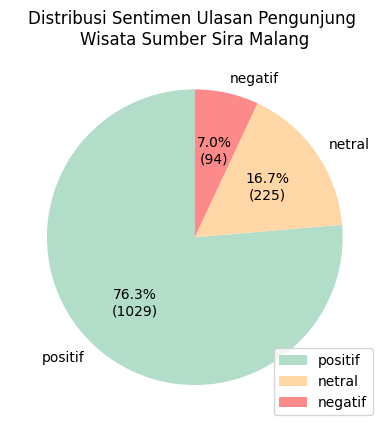

In [45]:
# Visualisasi Data Sentiment Value Counts (Pie Chart)
import matplotlib.pyplot as plt
import seaborn as sns

ulasanSumbersira = pd.read_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_sentiment.csv')

y = ulasanSumbersira['Sentiment'].value_counts()

# labels = nama kategori labeling, sizes = jumlah sentimen setiap labels
labels = list(y.index)
sizes = list(y.values)
total_sentiment = sum(sizes)

colors = ['#B1DDC9', '#FFD6A5', '#FD8A8A']

# Fungsi untuk menampilkan values dengan integer bukan persentage
def autopct_format(pct):
    absolute_value = int(round(pct/100.*total_sentiment))
    return f"{pct:.1f}%\n({absolute_value})"

# Menampilkan pie chart dengan start angle 90 derajat dan autopct_format untuk menampilkan value setiap kategori label
plt.pie(y, labels = labels, startangle = 90, autopct = autopct_format, colors = colors)
plt.title('Distribusi Sentimen Ulasan Pengunjung \nWisata Sumber Sira Malang')
plt.legend()
plt.show()

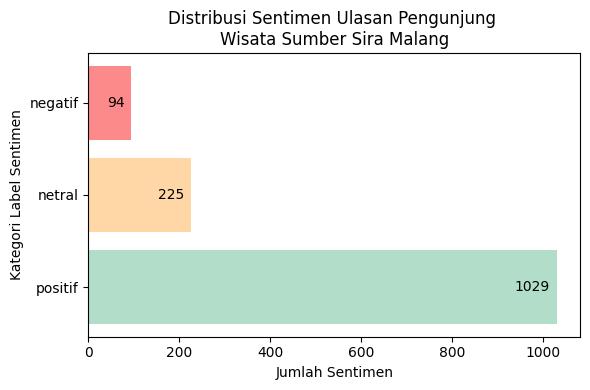

In [46]:
# Visualisasi Data Sentiment Value Counts (Horizontal Bar Chart)
import matplotlib.pyplot as plt
import pandas as pd

ulasanSumbersira = pd.read_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_sentiment.csv')

y = ulasanSumbersira['Sentiment'].value_counts()

# Fungsi untuk membuat horizontal bar, y.index = label, y.values = jumlah label
plt.figure(figsize=(6, 4))
bars = plt.barh(y.index, y.values, color=['#B1DDC9', '#FFD6A5', '#FD8A8A'])  # green, yellow, red

# Fungsi untuk menambahkan nilai values dalam horizontal bar
for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 15,
        bar.get_y() + bar.get_height() / 2,
        str(width),
        ha='right', va='center', color='black'
    )

# Memberikan label dan title
plt.xlabel("Jumlah Sentimen")
plt.ylabel("Kategori Label Sentimen")
plt.title("Distribusi Sentimen Ulasan Pengunjung \nWisata Sumber Sira Malang")
plt.tight_layout()
plt.show()

In [47]:
!pip install wordcloud

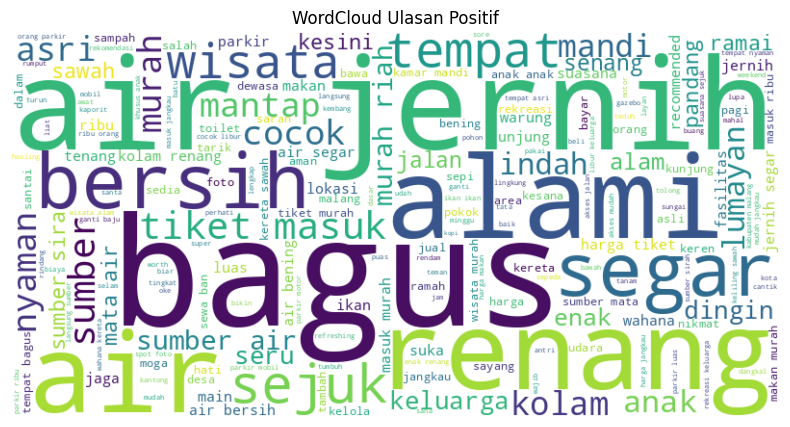

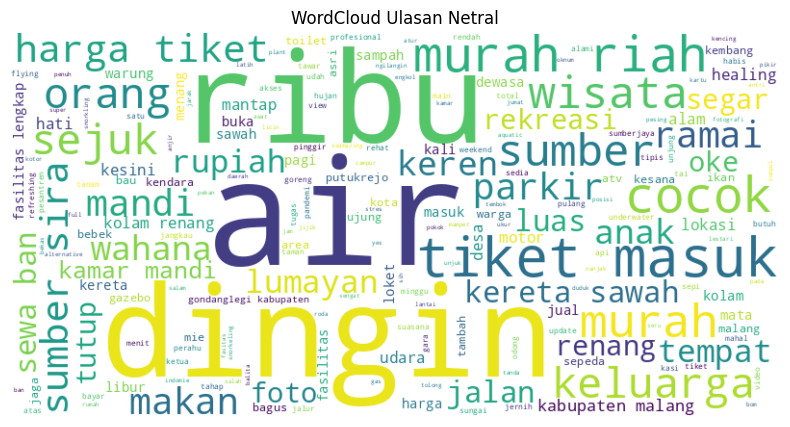

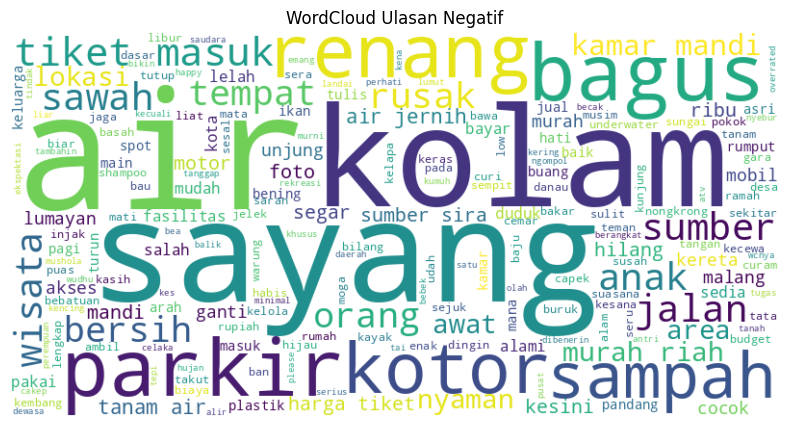

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

ulasanSumbersira = pd.read_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_sentiment.csv')

# Memastikan tidak ada kolom yang kosong
ulasanSumbersira = ulasanSumbersira.dropna(subset=['ulasan_stemming', 'Sentiment'])

labels = ['positif', 'netral', 'negatif']

for label in labels:
    # Menggabungkan semua ulasan sesuai sentimen
    text = " ".join(
        ulasanSumbersira[ulasanSumbersira['Sentiment'] == label]['ulasan_stemming'].astype(str)
    )

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Tampilkan WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud Ulasan {label.capitalize()}')
    plt.show()

# **9. Ringkasan Kategori Sentimen**

In [49]:
import pandas as pd
from collections import Counter

path1 = '/content/drive/MyDrive/portofolio_data_analyst/hasil_sentiment.csv'
df_scraping = pd.read_csv(path1)

# Memastikan agar tidak ada kolom yang kosong
df_scraping = df_scraping[['ulasan_stemming', 'Sentiment']].dropna()

# Menggabungkan teks masing-masing kelas
positif_texts = " . ".join(df_scraping[df_scraping['Sentiment'] == 'positif']['ulasan_stemming'].astype(str))
negatif_texts = " . ".join(df_scraping[df_scraping['Sentiment'] == 'negatif']['ulasan_stemming'].astype(str))
netral_texts  = " . ".join(df_scraping[df_scraping['Sentiment'] == 'netral']['ulasan_stemming'].astype(str))

# Fungsi summarization
def summarize_by_frequency(text):
    sentences = text.split(". ")
    total_sentences = len(sentences)

    top_n = max(1, total_sentences // 10)

    word_freq = Counter(" ".join(sentences).split())

    sentence_scores = {}
    for sentence in sentences:
        score = sum(word_freq[word] for word in sentence.split())
        sentence_scores[sentence] = score

    top_sentences = sorted(sentence_scores, key=sentence_scores.get, reverse=True)
    return top_sentences[:top_n]

# Print hasil ringkasan
print("=== Ringkasan Positif ===")
print("\n".join(summarize_by_frequency(positif_texts)))

print("\n=== Ringkasan Negatif ===")
print("\n".join(summarize_by_frequency(negatif_texts)))

print("\n=== Ringkasan Netral ===")
print("\n".join(summarize_by_frequency(netral_texts)))

=== Ringkasan Positif ===
wisata sumber sira kolam renang harga tiket masuk murah pakai air langsung sumber nama sumber sira air bening dingin segar makan wisata murah 
akses jalan bagus bingung nama sumber sira sumber bureng nama saran pakai kacamata renang pandang dalam air bagus ikan ikan air jernih tumbuh hijau tambah indah daya tarik 
wisata sumber sira wisata mati unjung anak anak remaja dewasa tempat enak nyaman bersih sejuk alami air jernih alami sumber bagus 
wisata alami asri harga tiket masuk murah orang air segar jernih cocok suka rendam air sedia toilet foodcourt makan ruang ganti taman area main anak komplit 
sumber air alami sejuk segar tenang tiket masuk ribu tiket parkir ribu ekonomis senang cocok refreshing main air pujasera lengkap agam menu makan harga jangkau 
nikmat wisata mandi alam alami tempat sawah sumber air segar tiket masuk murah rupiah mandi puas harap jaga rusak tanam air 
sumber mata air debit air limpah jernih cocok renang harga tiket murah harga makan 

# **10. Format CSV untuk Dashboard**

In [50]:
import pandas as pd
from datetime import datetime, timedelta
import re
import locale

path1 = '/content/drive/MyDrive/portofolio_data_analyst/HasilCekJumlahData.csv'
df_scraping = pd.read_csv(path1)

# Tanggal terakhir ambil data scraping
tanggal_scraping = datetime(2025, 2, 8)

# Mengubah format tanggal dari teks -> date
def konversi_bulan_tahun(teks):
    teks = teks.lower().strip()

    if teks == 'sebulan lalu':
        estimasi = tanggal_scraping - timedelta(days=30)
        return estimasi.strftime('%B %Y')
    elif teks == 'setahun lalu':
        estimasi = tanggal_scraping - timedelta(days=365)
        return estimasi.strftime('%B %Y')

    match = re.match(r"(\d+)\s+(tahun|bulan|minggu|hari)", teks)
    if not match:
        return None

    jumlah, satuan = int(match.group(1)), match.group(2)

    if satuan == "tahun":
        estimasi = tanggal_scraping - timedelta(days=jumlah * 365)
    elif satuan == "bulan":
        estimasi = tanggal_scraping - timedelta(days=jumlah * 30)
    elif satuan == "minggu":
        estimasi = tanggal_scraping - timedelta(weeks=jumlah)
    elif satuan == "hari":
        estimasi = tanggal_scraping - timedelta(days=jumlah)
    else:
        return None

    return estimasi.strftime('%B %Y')

df_scraping['bulan_tahun'] = df_scraping['rsqaWe'].apply(konversi_bulan_tahun)

df_scraping.to_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_ubah_tanggal.csv', index=False)

df_scraping

,wiI7pd,d4r55,rsqaWe,bulan_tahun
0,Enak banget jernih dan pas lagi sepi,Rahma Aaa,2 hari lalu,February 2025
1,Tempat berenang yang jernih alami airnya juga ...,Eka Pratomo,5 hari lalu,February 2025
2,Pemandangan cantik dan sumber yang jernih,Torek Iyho,2 minggu lalu,January 2025
3,Tempat sumber air yang jernih dan bisa buat be...,Dwi Prof,2 minggu lalu,January 2025
4,tiket dan makanan murah. petugasnya rendah hati.,Wawan Sobari,2 minggu lalu,January 2025
...,...,...,...,...
1359,Sumber mata air yang sangat bagus. Mohon untuk...,Moch. Nur Ifrochan,5 tahun lalu,February 2020
1360,Tempat nya nyaman dan asik,Sagitarius Learning,5 tahun lalu,February 2020
1361,Tempat mnghabiskan weekend recomended. Yg mau ...,zahrotut takiyah,5 tahun lalu,February 2020
1362,Segar,Widhy San,5 tahun lalu,February 2020


In [92]:
import pandas as pd
import numpy as np

path1 = '/content/drive/MyDrive/portofolio_data_analyst/hasil_ubah_tanggal.csv'
df_scraping = pd.read_csv(path1)

path2 = '/content/drive/MyDrive/portofolio_data_analyst/hasil_sentiment.csv'
df_sentimen = pd.read_csv(path2)

# Menghapus kolom yang bernilai kosong/duplikasi
df_sentimen['Sentiment'] = df_sentimen['Sentiment'].replace(r'^\s*$', np.nan, regex=True)
df_sentimen = df_sentimen.dropna(subset=['Sentiment'])
df_sentimen_unique = df_sentimen.drop_duplicates(subset='wiI7pd', keep='first')

# Gabung hasil konversi tanggal & hasil sentimen setiap ulasan
gabungan = pd.merge(df_scraping, df_sentimen_unique[['wiI7pd', 'Sentiment']], on='wiI7pd', how='inner')

gabungan.to_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_gabungan_tanggal_sentiment.csv', index=False)
gabungan

,wiI7pd,d4r55,rsqaWe,bulan_tahun,Sentiment
0,Enak banget jernih dan pas lagi sepi,Rahma Aaa,2 hari lalu,February 2025,positif
1,Tempat berenang yang jernih alami airnya juga ...,Eka Pratomo,5 hari lalu,February 2025,positif
2,Pemandangan cantik dan sumber yang jernih,Torek Iyho,2 minggu lalu,January 2025,positif
3,Tempat sumber air yang jernih dan bisa buat be...,Dwi Prof,2 minggu lalu,January 2025,positif
4,tiket dan makanan murah. petugasnya rendah hati.,Wawan Sobari,2 minggu lalu,January 2025,netral
...,...,...,...,...,...
1343,Sumber mata air yang sangat bagus. Mohon untuk...,Moch. Nur Ifrochan,5 tahun lalu,February 2020,positif
1344,Tempat nya nyaman dan asik,Sagitarius Learning,5 tahun lalu,February 2020,positif
1345,Tempat mnghabiskan weekend recomended. Yg mau ...,zahrotut takiyah,5 tahun lalu,February 2020,positif
1346,Segar,Widhy San,5 tahun lalu,February 2020,positif


In [94]:
import pandas as pd

path1 = '/content/drive/MyDrive/portofolio_data_analyst/hasil_gabungan_tanggal_sentiment.csv'
df_scraping = pd.read_csv(path1)

path2 = '/content/drive/MyDrive/portofolio_data_analyst/hasil_sentiment.csv'
df_sentimen = pd.read_csv(path2)

# Ambil ulasan dan gabung kembali (ulasan pengunjung, tanggal, dan sentimen)
gabungan = pd.concat([df_scraping[['wiI7pd', 'bulan_tahun']], df_sentimen[['Sentiment']]], axis=1)

gabungan.to_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_gabungan_ulasan_tanggal_sentiment.csv', index=False)
gabungan


,wiI7pd,bulan_tahun,Sentiment
0,Enak banget jernih dan pas lagi sepi,February 2025,positif
1,Tempat berenang yang jernih alami airnya juga ...,February 2025,positif
2,Pemandangan cantik dan sumber yang jernih,January 2025,positif
3,Tempat sumber air yang jernih dan bisa buat be...,January 2025,positif
4,tiket dan makanan murah. petugasnya rendah hati.,January 2025,netral
...,...,...,...
1343,Sumber mata air yang sangat bagus. Mohon untuk...,February 2020,positif
1344,Tempat nya nyaman dan asik,February 2020,positif
1345,Tempat mnghabiskan weekend recomended. Yg mau ...,February 2020,positif
1346,Segar,February 2020,positif


In [95]:
# Melihat jumlah masing-masing labeling

path1 = '/content/drive/MyDrive/portofolio_data_analyst/hasil_gabungan_tanggal_sentiment.csv'
df_scraping = pd.read_csv(path1)

df_scraping['Sentiment'].value_counts()

,count
Sentiment,
positif,1029
netral,225
negatif,94


In [96]:
path1 = '/content/drive/MyDrive/portofolio_data_analyst/hasil_gabungan_tanggal_sentiment.csv'
df = pd.read_csv(path1)

df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.lower()

filtered_df = df[
    (df['Sentiment'] == 'negatif')
]

print(filtered_df[['Sentiment']])

     Sentiment
8      negatif
9      negatif
15     negatif
32     negatif
37     negatif
...        ...
1281   negatif
1306   negatif
1327   negatif
1330   negatif
1340   negatif

[94 rows x 1 columns]


In [97]:
import pandas as pd

# 1. Baca file CSV
path1 = '/content/drive/MyDrive/portofolio_data_analyst/hasil_gabungan_tanggal_sentiment.csv'
df = pd.read_csv(path1)

# 2. Ubah format kolom waktu 'bulan_tahun' menjadi datetime
df['bulan_tahun'] = pd.to_datetime(
    df['bulan_tahun'].astype(str).str.strip(),
    format='%B %Y',
    errors='coerce'
)

# 3. Normalisasi kolom label sentimen ke huruf kecil
df['Sentiment'] = df['Sentiment'].astype(str).str.strip().str.lower()

# 4. Filter data Februari 2024 sampai Februari 2025 & label 'negatif'
start_date = '2020-01-01'
end_date = '2025-02-28'

filtered_df = df[
    (df['bulan_tahun'] >= start_date) &
    (df['bulan_tahun'] <= end_date) &
    (df['Sentiment'] == 'negatif')
]

# 5. Tampilkan hasil ulasan
print("Jumlah ulasan negatif antara Feb 2021 - Feb 2025:", len(filtered_df))
print(filtered_df[['wiI7pd', 'bulan_tahun', 'Sentiment']])

filtered_df.to_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_datanegatif_setahun_terakhir.csv', index=False)

Jumlah ulasan negatif antara Feb 2021 - Feb 2025: 94
                                                 wiI7pd bulan_tahun Sentiment
8     Penanganan tergadap pengunjung yang mengalamai...  2025-01-01   negatif
9     Overrated! Kamar mandi, kamar ganti minim dan ...  2025-01-01   negatif
15    Wisata alam murah meriah\nJalan masuk dari par...  2025-01-01   negatif
32    Kebersihan masih kurang, sampah berserakan dim...  2024-12-01   negatif
37    Jelek bgt gaada tempat duduk gabisa duduk dimana2  2024-12-01   negatif
...                                                 ...         ...       ...
1281                               Kurang perawatan nya  2020-02-01   negatif
1306  Kondisi saat musim liburan jam 10.00 sudah ram...  2020-02-01   negatif
1327                           Sayangnya pas ujan turun  2020-02-01   negatif
1330  Bagus, tapi masih kurang untuk fasilitas kamar...  2020-02-01   negatif
1340  Tempatnya bagus, cuman sayang tulisan "Sumber ...  2020-02-01   negatif

[94 rows x

# **11. Data Splitting**

In [56]:
from sklearn.model_selection import train_test_split

ulasanSumbersira = pd.read_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_sentiment.csv')

# Memastikan tidak ada baris kolom yang kosong
ulasanSumbersira = ulasanSumbersira.dropna(subset=['ulasan_normalisasi', 'Sentiment'])

# Ambil teks dan label dari dataframe
X = ulasanSumbersira['ulasan_normalisasi']
y = ulasanSumbersira['Sentiment']

# Split data: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42, # Agar data selalu sama setiap dijalankan
    stratify=y # Agar distribusi label seimbang
)

# Cek jumlah data hasil split
print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 1078
Jumlah data uji: 270


# **12. Pembobotan Kata TF-IDF**

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
# Hanya fit dan transform pada data latih
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform pada data uji (jangan fit ulang)
X_test_tfidf = vectorizer.transform(X_test)

In [58]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

In [59]:
from imblearn.over_sampling import SMOTE

# Menerapkan SMOTE untuk menyeimbangkan data minoritas
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Label Encoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train_resampled)
y_test_enc = le.transform(y_test)

In [60]:
feature_names = vectorizer.get_feature_names_out()

# Konversi hasil TF-IDF Data Latih ke DataFrame agar mudah dibaca
tfidf_X_train = pd.DataFrame(X_train_tfidf.toarray(), columns=feature_names)

tfidf_X_train

,abis,acara,ada,adalah,adanya,aer,aestetic,agak,agar,air,...,worth,wow,wudhu,yaitu,yakni,yang,yes,you,youtube,zonk
0,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.153099,...,0.0,0.000000,0.0,0.0,0.0,0.132314,0.0,0.0,0.0,0.0
1,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.191709,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.00000,0.0,0.251874,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1074,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1075,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1076,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [61]:
# Konversi hasil TF-IDF Data Uji ke DataFrame agar mudah dibaca
tfidf_X_test = pd.DataFrame(X_test_tfidf.toarray(), columns=feature_names)

tfidf_X_test

,abis,acara,ada,adalah,adanya,aer,aestetic,agak,agar,air,...,worth,wow,wudhu,yaitu,yakni,yang,yes,you,youtube,zonk
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.229340,0.0,0.0,0.0,0.0,0.0,0.0,0.104202,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.211335,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.0,0.0,0.125774,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
266,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
267,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
268,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


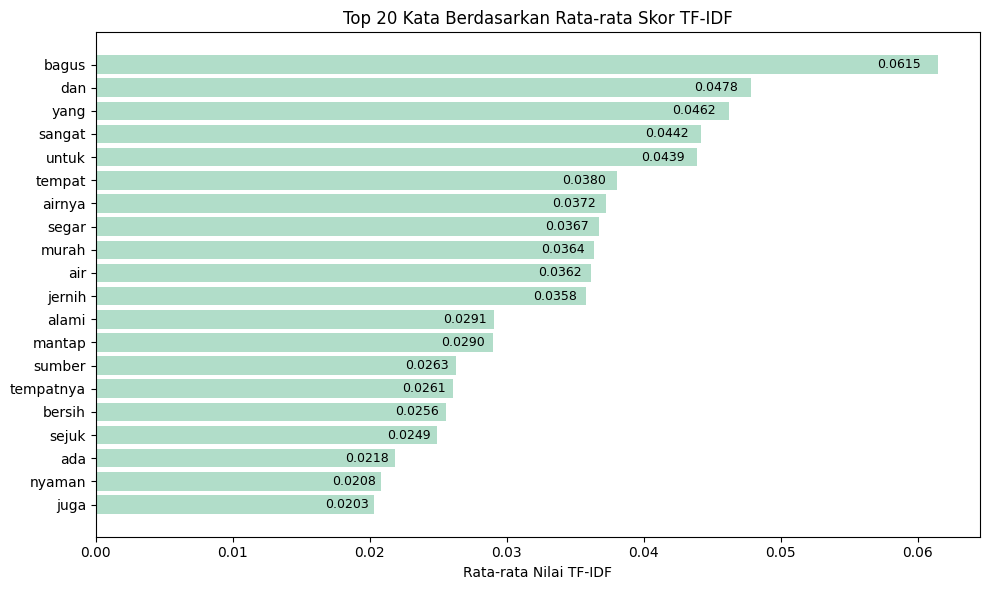

In [62]:
import matplotlib.pyplot as plt
import numpy as np

average_tfidf = X_train_tfidf.mean(axis=0).A1

# Gabungkan kata dan skor, lalu urutkan
tfidf_scores = list(zip(feature_names, average_tfidf))
sorted_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)

# Ambil top-N kata
top_n = 20
top_words = sorted_scores[:top_n]
words, scores = zip(*top_words)

# Visualisasi
plt.figure(figsize=(10,6))
bars = plt.barh(words[::-1], scores[::-1], color='#B1DDC9')
plt.xlabel("Rata-rata Nilai TF-IDF")
plt.title(f"Top {top_n} Kata Berdasarkan Rata-rata Skor TF-IDF")

# Tambahkan label di dalam bar
for bar, score in zip(bars, scores[::-1]):
    plt.text(bar.get_width() * 0.98,
             bar.get_y() + bar.get_height() / 2,
             f"{score:.4f}",
             ha='right', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

# **13. SUPPORT VECTOR MACHINE + TF IDF**

In [63]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat model SVM dengan class_weight
svm_balanced = LinearSVC(class_weight='balanced', random_state=42)

# Latih model (Data Latih)
svm_balanced.fit(X_train_tfidf, y_train)

# Prediksi (Data Uji)
y_pred_balanced = svm_balanced.predict(X_test_tfidf)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_balanced))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_balanced))

Confusion Matrix:
[[  6   0  13]
 [  2  27  16]
 [  5  13 188]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.46      0.32      0.38        19
      netral       0.68      0.60      0.64        45
     positif       0.87      0.91      0.89       206

    accuracy                           0.82       270
   macro avg       0.67      0.61      0.63       270
weighted avg       0.81      0.82      0.81       270


Accuracy Score:
0.8185185185185185


In [64]:
!pip install seaborn matplotlib

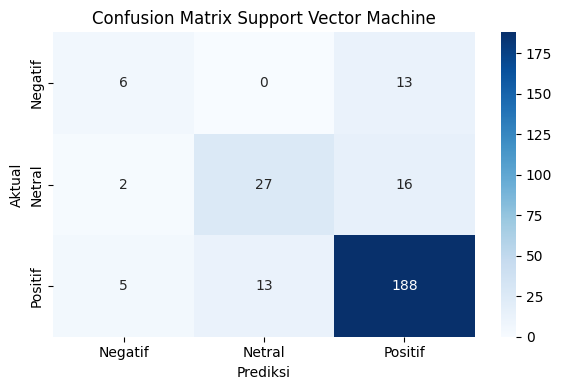

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test, y_pred_balanced)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Support Vector Machine')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

In [66]:
# Data baru yang ingin diprediksi
data_baru = ['jelek dan banyak sampah']

# Transformasi menggunakan vectorizer yang sama
data_baru_tfidf = vectorizer.transform(data_baru)

# Prediksi
hasil_prediksi = svm_balanced.predict(data_baru_tfidf)

print("Hasil prediksi:", hasil_prediksi[0])

Hasil prediksi: negatif


# **14. K-NEAREST NEIGHBOR + TF IDF**

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat model KNN dengan jumlah tetangga (k) = 5
model_knn = KNeighborsClassifier(n_neighbors=5)

# Latih model (Data Latih)
model_knn.fit(X_train_tfidf, y_train)

# Prediksi (Data Uji)
y_pred_knn = model_knn.predict(X_test_tfidf)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_knn))

Confusion Matrix:
[[  2   0  17]
 [  1  23  21]
 [  2  26 178]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.40      0.11      0.17        19
      netral       0.47      0.51      0.49        45
     positif       0.82      0.86      0.84       206

    accuracy                           0.75       270
   macro avg       0.56      0.49      0.50       270
weighted avg       0.74      0.75      0.74       270


Accuracy Score:
0.7518518518518519


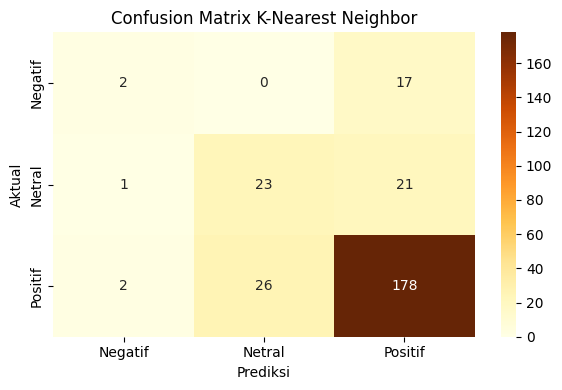

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test, y_pred_knn)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlOrBr',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix K-Nearest Neighbor')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# **15. NAIVE BAYES CLASSIFIER + TF IDF**

In [69]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat model NBC dengan MultinomialNB
model_nb = MultinomialNB()

# Latih model (Data Latih SMOTE)
model_nb.fit(X_train_resampled, y_train_resampled)

# Prediksi (Data Uji)
y_pred_nb = model_nb.predict(X_test_tfidf)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_nb))

Confusion Matrix:
[[  9   0  10]
 [  9  24  12]
 [ 16  15 175]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.26      0.47      0.34        19
      netral       0.62      0.53      0.57        45
     positif       0.89      0.85      0.87       206

    accuracy                           0.77       270
   macro avg       0.59      0.62      0.59       270
weighted avg       0.80      0.77      0.78       270


Accuracy Score:
0.7703703703703704


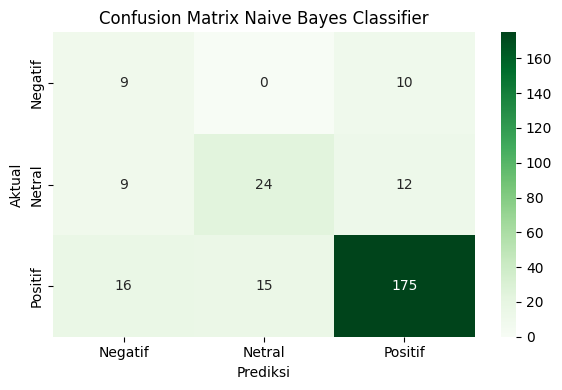

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test, y_pred_nb)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Naive Bayes Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# **16. Pembobotan Kata FAST TEXT**

In [71]:
# Simpan data ke file txt dengan format FastText
def save_fasttext_format(X, y, filename): # X (ulasan), y (label), filename (nama file output.txt)
    with open(filename, 'w', encoding='utf-8') as f:
        for text, label in zip(X, y):
            line = f"__label__{label} {text}\n"
            f.write(line)

save_fasttext_format(X_train, y_train, 'train.txt')
save_fasttext_format(X_test, y_test, 'test.txt')

In [72]:
!pip install fasttext
import fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498209 sha256=e94c236c593f473e3ba3e8ba0caff720473f0901222a7d00c38cc4c4b9671bb5
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext


In [73]:
# === FEATURE EXTRACTION MENGGUNAKAN FASTTEXT EMBEDDING ===
# Ubah teks menjadi vektor embedding dari model fasttext
from sklearn.preprocessing import LabelEncoder

model = fasttext.train_supervised('train.txt', epoch=25, lr=1.0, wordNgrams=2, verbose=2)

def get_embedding(texts, model):
    embeddings = []
    for text in texts:
        embeddings.append(model.get_sentence_vector(text))
    return np.array(embeddings)

X_train_emb = get_embedding(X_train, model)
X_test_emb = get_embedding(X_test, model)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [74]:
model.get_word_vector('air')

array([ 0.0386073 ,  0.11936355, -0.00727591, -0.07267076,  0.22428584,
        0.05883537, -0.00051263, -0.09637218,  0.15801382,  0.14962715,
       -0.02634878,  0.0901116 , -0.02955625,  0.08203686, -0.05359393,
       -0.00201239, -0.03455452, -0.05540065,  0.00773048, -0.02599631,
        0.10240517,  0.10428654,  0.10501332, -0.15754125,  0.04415279,
       -0.07778633,  0.09310945, -0.0565377 , -0.06319733,  0.16786979,
       -0.02044559, -0.0682752 , -0.07565929, -0.00924015, -0.1701317 ,
        0.00659679,  0.07109721, -0.03551004,  0.05197226, -0.02598481,
       -0.00489389,  0.12591995,  0.0611355 ,  0.10522293,  0.05959366,
       -0.02717054,  0.05551017,  0.00710787, -0.10115995,  0.04192577,
       -0.09900063,  0.04086488, -0.15717988,  0.01460141, -0.00850959,
       -0.09650206, -0.02614802,  0.0573058 ,  0.14390887,  0.04766936,
       -0.01041823,  0.11397672,  0.13089727,  0.05042928, -0.09527258,
        0.0611453 , -0.15700476,  0.01784432, -0.02529255,  0.08

In [75]:
model.get_sentence_vector('tempat bagus air bersih jernih segar asli sumber alam')

array([ 1.37643173e-01,  1.39726803e-01,  1.68728158e-02, -1.03836045e-01,
        3.61466289e-01,  6.91149831e-02, -3.95025015e-02, -1.88381121e-01,
        2.24269360e-01,  2.20775008e-01, -5.17516807e-02,  1.50386319e-01,
       -1.04179680e-01,  7.97613859e-02, -7.94461742e-02, -1.70028582e-02,
       -5.59275709e-02, -1.11846432e-01, -7.72778457e-03, -9.59476829e-03,
        1.82377905e-01,  1.46352947e-01,  1.76668569e-01, -2.56276637e-01,
        6.28943294e-02, -8.00350755e-02,  1.42948359e-01, -9.81975272e-02,
       -9.55859274e-02,  2.24878341e-01, -7.02632731e-03, -1.19020134e-01,
       -9.33966413e-02, -1.57608446e-02, -2.19512314e-01,  1.53756170e-02,
        7.96746835e-02, -2.47941725e-02,  8.20251182e-02, -1.75836030e-02,
       -7.72263110e-02,  1.69104874e-01,  7.45197237e-02,  1.53260738e-01,
        1.18484274e-01, -7.01168180e-02,  1.01552635e-01,  7.73546332e-03,
       -1.42252505e-01,  4.05514240e-02, -1.19947650e-01,  3.05860732e-02,
       -2.21783057e-01, -

In [76]:
model.get_nearest_neighbors('sumber')

[(0.9987994432449341, 'memuaskan'),
 (0.9987638592720032, 'inovasi'),
 (0.9983623027801514, 'alam'),
 (0.9977821707725525, 'renang'),
 (0.9973287582397461, 'tambah'),
 (0.9968964457511902, 'datang'),
 (0.9967459440231323, 'disana'),
 (0.9952636957168579, 'lagi'),
 (0.9947878122329712, 'begitu'),
 (0.9942073822021484, 'anak')]

In [77]:
import pandas as pd

labels_with_prefix = ['__label__' + str(label) for label in y_train]
df_emb = pd.DataFrame(X_train_emb)
df_emb.insert(0, 'label', labels_with_prefix)
df_emb['teks'] = X_train.values

In [78]:
df_emb

,label,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,teks
0,__label__positif,0.048480,0.034582,0.007313,-0.031453,0.113390,0.016940,-0.018511,-0.063264,0.063183,...,-0.047755,0.055929,-0.063196,-0.040733,-0.081407,-0.035556,-0.018110,-0.043681,-0.009455,reservasi dan perbaikan kurang tong sampah yan...
1,__label__netral,-0.133773,-0.009028,-0.035915,0.057340,-0.205538,0.005522,0.065861,0.135457,-0.084184,...,0.126655,-0.044251,0.070620,0.068762,0.114829,0.084608,0.070064,0.065803,0.009132,berapa harga tiket masuknya
2,__label__positif,0.026438,0.053984,-0.002282,-0.027877,0.101475,0.027342,-0.002580,-0.047704,0.071948,...,-0.026642,0.072214,-0.074759,-0.041646,-0.085445,-0.023314,0.000518,-0.044237,-0.011967,mantap banyak wahana dan tempatnya juga sangat...
3,__label__positif,0.018173,0.073107,-0.007367,-0.030971,0.112417,0.039498,0.006743,-0.046378,0.088007,...,-0.021938,0.092902,-0.094159,-0.047148,-0.104366,-0.021015,0.009520,-0.053698,-0.017138,tempatnya sejuk karena sumber mata air bisa un...
4,__label__positif,0.021197,0.030837,0.001178,-0.019114,0.067027,0.016565,-0.004048,-0.033278,0.046092,...,-0.021143,0.044254,-0.047132,-0.026643,-0.055099,-0.017215,-0.002347,-0.028047,-0.007932,lebih seringnya kesini cuma untuk ngopi tidak ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,__label__positif,0.025117,0.056294,-0.000778,-0.029073,0.099855,0.028599,-0.000696,-0.044457,0.074762,...,-0.027073,0.075011,-0.076198,-0.041125,-0.088233,-0.022431,0.002662,-0.045742,-0.012189,tempat bagus lumayan wisata didesa cocok area ...
1074,__label__positif,0.057275,0.045668,0.010362,-0.039220,0.136316,0.022619,-0.016772,-0.075831,0.078472,...,-0.057170,0.070375,-0.079622,-0.052186,-0.101859,-0.042279,-0.019290,-0.055200,-0.015079,bagus kalau foto
1075,__label__netral,-0.107852,0.045007,-0.039616,0.032850,-0.104465,0.033078,0.064754,0.088207,-0.013338,...,0.101589,0.027780,-0.004619,0.027688,0.027534,0.061342,0.073059,0.020684,-0.005181,view mantap untuk kita terutama keluarga
1076,__label__positif,0.176697,0.192588,0.017572,-0.138149,0.483985,0.093042,-0.049427,-0.248248,0.306183,...,-0.176725,0.281630,-0.304527,-0.185220,-0.374612,-0.131493,-0.043423,-0.197037,-0.049324,seru murah dan segar airnya jernih


In [79]:
print(X_test.iloc[0])  # teks asli
print(X_test_emb[0])   # vektor hasil FastText

tempatnya sejuk menyegarkan
[-0.11513589  0.08908848 -0.04631341  0.02336275 -0.06644312  0.05619683
  0.0772677   0.08177833  0.0334106   0.02193185  0.02066521  0.00854019
  0.09420677  0.04301145 -0.02460269  0.02721849  0.02237365  0.04061195
  0.05145381 -0.08028386 -0.04163396  0.0313844  -0.02806459  0.04059182
  0.00757795 -0.04644712  0.01556947  0.02505856 -0.00844604  0.04680242
 -0.02403047  0.03041481 -0.05924435 -0.01652738 -0.05360668 -0.01697832
  0.02042326 -0.03510627 -0.00262815 -0.05081346  0.12552723  0.03138077
  0.0262027   0.0113272  -0.0532383   0.03280731 -0.04434909 -0.01106418
 -0.03334839  0.03037533 -0.05785025  0.04429025 -0.02844238  0.0436916
  0.03666692  0.04061787  0.00018869 -0.01183791  0.04124691  0.03409068
 -0.0907672  -0.00471805  0.02897548  0.00383111 -0.03145575 -0.03346363
 -0.04121201  0.07209819  0.07175737  0.0044369   0.0141148  -0.05908472
 -0.07274921  0.01351085  0.00861948 -0.06577847  0.00606376  0.04298466
 -0.00335687 -0.02978423

In [80]:
print(X_train.iloc[0])  # teks asli
print(X_train_emb[0])   # vektor hasil FastText

reservasi dan perbaikan kurang tong sampah yang minimal kalau soal air bening sangat
[ 0.04848     0.03458207  0.00731279 -0.03145343  0.11339036  0.01694039
 -0.01851077 -0.06326375  0.0631832   0.06290971 -0.01667486  0.0422131
 -0.03845428  0.02060318 -0.02157139 -0.00802441 -0.0186653  -0.03370591
 -0.006027    0.00257322  0.0575818   0.04136803  0.054398   -0.07739286
  0.01893641 -0.02109748  0.04203887 -0.03054325 -0.02699009  0.06189839
 -0.00100241 -0.03812298 -0.02287649 -0.0026553  -0.06318353  0.00580819
  0.02059396 -0.00409479  0.02579836 -0.00194778 -0.0314342   0.04910333
  0.01984737  0.04596386  0.03777194 -0.02152041  0.03377285  0.00408735
 -0.04022582  0.01077946 -0.03166437  0.00541214 -0.06425034 -0.00427504
 -0.01368062 -0.05083318 -0.01276982  0.02530553  0.05205817  0.01594175
  0.015707    0.05456374  0.04967034  0.02774369 -0.03378652  0.03820314
 -0.06114742 -0.00440153 -0.0280653   0.03914988 -0.0814019   0.04787748
  0.04408207 -0.00764249 -0.03831942  0.

# **17. SUPPORT VECTOR MACHINE + FAST TEXT**

In [81]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train dan evaluasi KNN
svm_clf = SVC(kernel='linear', class_weight='balanced')
svm_clf.fit(X_train_emb, y_train_enc)
y_pred_svm_fasttext = svm_clf.predict(X_test_emb)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred_svm_fasttext))

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_svm_fasttext, target_names=le.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test_enc, y_pred_svm_fasttext))

Confusion Matrix:
[[  4   1  14]
 [  3  28  14]
 [  3  12 191]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.40      0.21      0.28        19
      netral       0.68      0.62      0.65        45
     positif       0.87      0.93      0.90       206

    accuracy                           0.83       270
   macro avg       0.65      0.59      0.61       270
weighted avg       0.81      0.83      0.81       270


Accuracy Score:
0.825925925925926


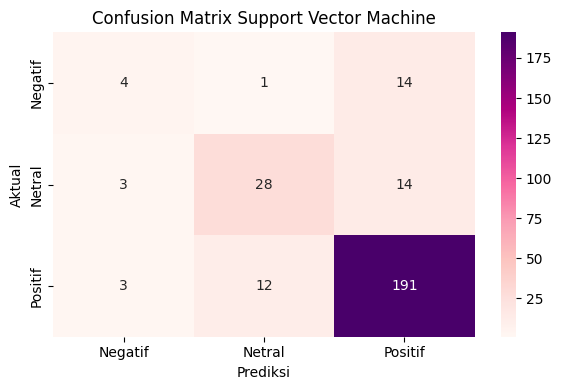

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test_enc, y_pred_svm_fasttext)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='RdPu',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Support Vector Machine')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# **18. K-NEAREST NEIGHBOR + FAST TEXT**

In [83]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train dan evaluasi KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_emb, y_train_enc)
y_pred_knn_fasttext = knn_clf.predict(X_test_emb)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred_knn_fasttext))

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_knn_fasttext, target_names=le.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test_enc, y_pred_knn_fasttext))

Confusion Matrix:
[[  4   1  14]
 [  3  27  15]
 [  3  10 193]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.40      0.21      0.28        19
      netral       0.71      0.60      0.65        45
     positif       0.87      0.94      0.90       206

    accuracy                           0.83       270
   macro avg       0.66      0.58      0.61       270
weighted avg       0.81      0.83      0.82       270


Accuracy Score:
0.8296296296296296


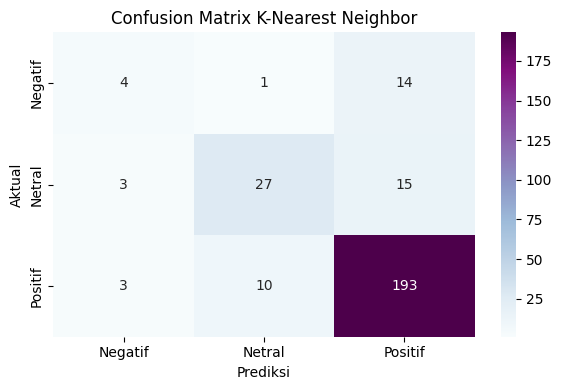

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test_enc, y_pred_knn_fasttext)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix K-Nearest Neighbor')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()

# **19. NAIVE BAYES CLASSIFIER + FAST TEXT**

In [85]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Train dan evaluasi Naive Bayes (GaussianNB)
nb_clf = GaussianNB()
nb_clf.fit(X_train_emb, y_train_enc)
y_pred_nb_fasttext = nb_clf.predict(X_test_emb)

# Evaluasi (Prediksi)
print("Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred_nb_fasttext))

print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred_nb_fasttext, target_names=le.classes_))

print("\nAccuracy Score:")
print(accuracy_score(y_test_enc, y_pred_nb_fasttext))

Confusion Matrix:
[[ 11   1   7]
 [  4  29  12]
 [  8  12 186]]

Classification Report:
              precision    recall  f1-score   support

     negatif       0.48      0.58      0.52        19
      netral       0.69      0.64      0.67        45
     positif       0.91      0.90      0.91       206

    accuracy                           0.84       270
   macro avg       0.69      0.71      0.70       270
weighted avg       0.84      0.84      0.84       270


Accuracy Score:
0.837037037037037


# **20. IMPLEMENTASI ALGORIMA TERBAIK**

In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# Membaca data
ulasanSumbersira = pd.read_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_sentiment.csv')

# Ambil kolom ulasan yang akan diprediksi
all_texts = ulasanSumbersira['ulasan_normalisasi'].astype(str).tolist()

# Pembobotan kata
model = fasttext.train_supervised('train.txt', epoch=25, lr=1.0, wordNgrams=2, verbose=2)

def get_embedding(texts, model):
    embeddings = []
    for text in texts:
        embeddings.append(model.get_sentence_vector(text))
    return np.array(embeddings)

X_train_emb = get_embedding(X_train, model)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

# Latih model GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train_emb, y_train_enc)

# Prediksi seluruh data
all_embeddings = get_embedding(all_texts, model)
all_preds_encoded = nb_clf.predict(all_embeddings)
all_preds_labels = le.inverse_transform(all_preds_encoded)

# Simpan data ke dataframe
ulasanSumbersira['label_nbc_fasttext'] = all_preds_labels

# Tampilkan contoh hasil
print(ulasanSumbersira[['ulasan_normalisasi', 'label_nbc_fasttext']].head())

# Simpan hasil ke Drive
ulasanSumbersira.to_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_prediksi_NBC_fasttext.csv', index=False)


                                  ulasan_normalisasi label_nbc_fasttext
0              enak sangat jernih dan saat lagi sepi            positif
1  tempat berenang yang jernih alami airnya juga ...            positif
2          pemandangan cantik dan sumber yang jernih            positif
3  tempat sumber air yang jernih dan bisa untuk b...            positif
4     tiket dan makanan murah petugasnya rendah hati             netral


In [99]:
path1 = '/content/drive/MyDrive/portofolio_data_analyst/hasil_prediksi_NBC_fasttext.csv'
df_nbc = pd.read_csv(path1)

df_nbc['label_nbc_fasttext'].value_counts()

,count
label_nbc_fasttext,
positif,1028
netral,222
negatif,98


# **21. VISUALISASI DATA (SESUDAH)**

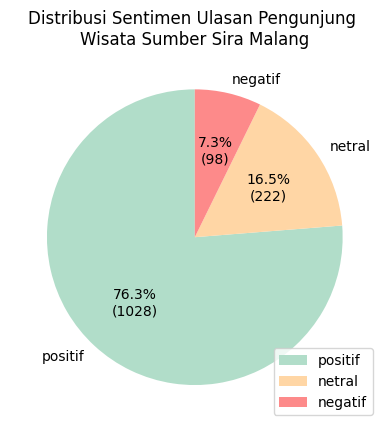

In [88]:
# Visualisasi Data Sentiment Value Counts (Pie Chart)
import matplotlib.pyplot as plt
import seaborn as sns

ulasanSumbersira = pd.read_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_prediksi_NBC_fasttext.csv')

y = ulasanSumbersira['label_nbc_fasttext'].value_counts()

# labels = nama kategori labeling, sizes = jumlah sentimen setiap labels
labels = list(y.index)
sizes = list(y.values)
total_sentiment = sum(sizes)

colors = ['#B1DDC9', '#FFD6A5', '#FD8A8A']

# Fungsi untuk menampilkan values dengan integer bukan persentage
def autopct_format(pct):
    absolute_value = int(round(pct/100.*total_sentiment))
    return f"{pct:.1f}%\n({absolute_value})"

# Menampilkan pie chart dengan start angle 90 derajat dan autopct_format untuk menampilkan value setiap kategori label
plt.pie(y, labels = labels, startangle = 90, autopct = autopct_format, colors = colors)
plt.title('Distribusi Sentimen Ulasan Pengunjung \nWisata Sumber Sira Malang')
plt.legend()
plt.show()

In [102]:
import pandas as pd

path1 = '/content/drive/MyDrive/portofolio_data_analyst/hasil_gabungan_tanggal_sentiment.csv'
df_scraping = pd.read_csv(path1)

path2 = '/content/drive/MyDrive/portofolio_data_analyst/hasil_prediksi_NBC_fasttext.csv'
df_sentimen = pd.read_csv(path2)

# Ambil ulasan dan gabung kembali (ulasan pengunjung, tanggal, dan sentimen)
gabungan = pd.concat([df_scraping[['wiI7pd', 'bulan_tahun']], df_sentimen[['label_nbc_fasttext']]], axis=1)

gabungan.to_csv('/content/drive/MyDrive/portofolio_data_analyst/hasil_gabungan_algoritma_terbaik.csv', index=False)
gabungan

,wiI7pd,bulan_tahun,label_nbc_fasttext
0,Enak banget jernih dan pas lagi sepi,February 2025,positif
1,Tempat berenang yang jernih alami airnya juga ...,February 2025,positif
2,Pemandangan cantik dan sumber yang jernih,January 2025,positif
3,Tempat sumber air yang jernih dan bisa buat be...,January 2025,positif
4,tiket dan makanan murah. petugasnya rendah hati.,January 2025,netral
...,...,...,...
1343,Sumber mata air yang sangat bagus. Mohon untuk...,February 2020,positif
1344,Tempat nya nyaman dan asik,February 2020,positif
1345,Tempat mnghabiskan weekend recomended. Yg mau ...,February 2020,positif
1346,Segar,February 2020,positif


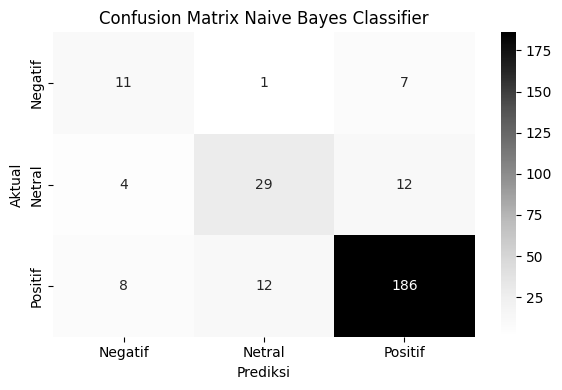

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# y_test (aktual) dan y_pred_balanced (prediksi)
cm = confusion_matrix(y_test_enc, y_pred_nb_fasttext)
labels = ['Negatif', 'Netral', 'Positif']

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys',
            xticklabels=labels, yticklabels=labels)

plt.title('Confusion Matrix Naive Bayes Classifier')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.tight_layout()
plt.show()